# Modules and functions

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import shutil
import cv2
import csv
import os
%matplotlib inline

def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)

        shutil.rmtree(directory, ignore_errors=True)
        os.makedirs(directory)
    except OSError:
        print('Error: Creating directory. ' + directory)

## Haar for 1 image

In [3]:
# This is the cascade we just made. Call what you want
# cascade5 = cv2.CascadeClassifier('haar55/cascade.xml')
# cascade10 = cv2.CascadeClassifier('haar1010/cascade.xml')
# cascade20 = cv2.CascadeClassifier('haar2020/cascade.xml')
cascade30 = cv2.CascadeClassifier('Haar/haar2020/cascade.xml')

image = '1.JPG'

img = cv2.imread('./test/' + image)
img_c = img.copy()

# filters
gray = cv2.cvtColor(img_c, cv2.COLOR_BGR2GRAY)
# gaus = cv2.GaussianBlur(gray, (5, 5), 2)

# vertex5 = cascade.detectMultiScale(img_c)
# vertex10 = cascade.detectMultiScale(img_c)
# vertex20 = cascade.detectMultiScale(img_c)
vertex30 = cascade30.detectMultiScale(img_c)

# for (x,y,w,h) in vertex5:
# #     print('vertex5')
#     cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,255),2)

# for (x,y,w,h) in vertex10:
# #     print('vertex10')
#     cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

# for (x,y,w,h) in vertex20:
# #     print('vertex20')
#     cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

for (x,y,w,h) in vertex30:
#     print('vertex30')
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    
# cv2.imshow('img',img)
cv2.imwrite(image, img)
# cv2.waitKey()

True

## Haar for many images

In [20]:
# create folder
path = './../haar_3030_1/'
createFolder(path)

# This is the cascade we just made. Call what you want
# cascade5 = cv2.CascadeClassifier('haar55/cascade.xml')
# cascade10 = cv2.CascadeClassifier('haar1010/cascade.xml')
# cascade20 = cv2.CascadeClassifier('haar2020/cascade.xml')
cascade30 = cv2.CascadeClassifier('./../models/3030/haar_3030_1/cascade.xml')

for i in range(1, 13):
    image = str(i) + '.jpg'

    img = cv2.imread('./../data/' + image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gaus = cv2.GaussianBlur(gray, (5, 5), 2)

    # vertex5 = cascade.detectMultiScale(img_c)
    # vertex10 = cascade.detectMultiScale(img_c)
    # vertex20 = cascade.detectMultiScale(img_c)
    vertex30 = cascade30.detectMultiScale(img)

    # for (x,y,w,h) in vertex5:
    # #     print('vertex5')
    #     cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,255),2)

    # for (x,y,w,h) in vertex10:
    # #     print('vertex10')
    #     cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

    # for (x,y,w,h) in vertex20:
    # #     print('vertex20')
    #     cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    
    datcoord = path + 'CannyOutput_y_x' + '.txt'
    dat = open(datcoord, 'w')
    for i in range(0, len(indices[0])):
        dat.write(str(indices[0][i]) + ' ' + str(indices[1][i]) + '\n')
    dat.close()
    
    it = 0
    for (x,y,w,h) in vertex30:
        it += 1
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    
    # INFO
    print(str(i) + '.jpg' + ' Haar recognition:', it)
    
    # cv2.imshow('img',img)
    cv2.imwrite(path + image, img)

1.jpg Haar recognition: 6
2.jpg Haar recognition: 7
3.jpg Haar recognition: 9
4.jpg Haar recognition: 3
5.jpg Haar recognition: 2
6.jpg Haar recognition: 9
7.jpg Haar recognition: 10
8.jpg Haar recognition: 10
9.jpg Haar recognition: 3
10.jpg Haar recognition: 4
11.jpg Haar recognition: 8
12.jpg Haar recognition: 6


# Simple testing Haar

In [43]:
wastefiles = ['.DS_Store', '.ipynb_checkpoints']

modelDir = './../models/'
listOfModelsFiles = os.listdir(modelDir)

listOfModelsFiles.sort()

# errors and debug logs
# sys.stdout = open('./result/' + 'output.log', 'w')

for i in listOfModelsFiles:
    if i not in wastefiles:
        # create folder
        path = './../' + str(i) + '/'
        createFolder(path)
        
        print(i)

        cascade30 = cv2.CascadeClassifier(modelDir + str(i) + '/cascade.xml')
        
        Dir = './../data/'
        listOfFiles = os.listdir(Dir)
        
        listOfFiles.sort()
        
        print(listOfFiles)
        
        datcoord = './../' + str(i) + '.txt'
        dat = open(datcoord, 'w')
        
        for j in listOfFiles:
            if j not in wastefiles:
                image = str(j)

                img = cv2.imread(Dir + image)
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                gaus = cv2.GaussianBlur(gray, (5, 5), 2)

                vertex30 = cascade30.detectMultiScale(img)

                it = 0
                for (x,y,w,h) in vertex30:
                    it += 1
                    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

                # INFO
                dat.write(str(j) + ' Haar recognition:' + str(it) + '\n')
                
                print(str(j) + '.jpg' + ' Haar recognition:', it)

                # cv2.imshow('img',img)
                cv2.imwrite(path + image, img)
        dat.close()

haar2020_3
['.DS_Store', '100_4.JPG', '101_7.JPG', '102_8.JPG', '103_8.JPG', '104_6.JPG', '105_6.JPG', '106_6.JPG', '107_8.JPG', '108_4.JPG', '109_4.JPG', '10_2.JPG', '110_4.JPG', '111_2.JPG', '112_4.JPG', '113_4.JPG', '114_5.JPG', '115_5.JPG', '116_5.JPG', '117_5.JPG', '118_4.JPG', '119_4.JPG', '11_2.JPG', '120_6.JPG', '121_4.JPG', '122_3.JPG', '123_6.JPG', '12_2.JPG', '13_2.JPG', '14_2.JPG', '154_6.JPG', '155_6.JPG', '156_3.JPG', '157_13.JPG', '158_5.JPG', '159_7.JPG', '15_2.JPG', '160_6.JPG', '161_6.JPG', '162_9.JPG', '163_8.JPG', '164_6.JPG', '165_20.JPG', '166_5.JPG', '167_7.JPG', '168_5.JPG', '169_7.JPG', '16_2.JPG', '170_5.JPG', '171_5.JPG', '172_8.JPG', '173_5.JPG', '174_5.JPG', '175_6.JPG', '176_4.JPG', '177_12.JPG', '178_9.JPG', '179_10.JPG', '17_2.JPG', '180_14.JPG', '181_12.JPG', '182_11.JPG', '183_11.JPG', '184_7.jpg', '185_12.JPG', '186_12.JPG', '187_21.JPG', '188_6.JPG', '189_5.JPG', '18_2.JPG', '190_25.jpg', '191_7.JPG', '192_4.JPG', '199_15.JPG', '19_2.JPG', '1_2.JPG',

219_6.JPG.jpg Haar recognition: 6
21_2.JPG.jpg Haar recognition: 3
223_5.JPG.jpg Haar recognition: 3
224_8.JPG.jpg Haar recognition: 7
226_7.JPG.jpg Haar recognition: 2
227_6.JPG.jpg Haar recognition: 6
228_7.JPG.jpg Haar recognition: 6
229_6.JPG.jpg Haar recognition: 4
22_2.JPG.jpg Haar recognition: 2
230_6.JPG.jpg Haar recognition: 6
231_6.JPG.jpg Haar recognition: 6
232_4.JPG.jpg Haar recognition: 4
234_6.JPG.jpg Haar recognition: 6
235_4.JPG.jpg Haar recognition: 4
236_5.JPG.jpg Haar recognition: 5
237_6.JPG.jpg Haar recognition: 6
238_9.JPG.jpg Haar recognition: 0
239_4.JPG.jpg Haar recognition: 4
23_2.JPG.jpg Haar recognition: 3
241_4.JPG.jpg Haar recognition: 4
242_4.JPG.jpg Haar recognition: 3
245_6.JPG.jpg Haar recognition: 5
246_6.JPG.jpg Haar recognition: 6
247_5.JPG.jpg Haar recognition: 1
24_6.JPG.jpg Haar recognition: 6
253_5.JPG.jpg Haar recognition: 5
256_7.JPG.jpg Haar recognition: 7
257_5.JPG.jpg Haar recognition: 5
258_7.JPG.jpg Haar recognition: 7
259_6.JPG.jpg Haar

50_3.JPG.jpg Haar recognition: 3
510_7.JPG.jpg Haar recognition: 4
511_9.JPG.jpg Haar recognition: 9
512_7.JPG.jpg Haar recognition: 7
515_6.JPG.jpg Haar recognition: 6
516_9.JPG.jpg Haar recognition: 9
519_8.JPG.jpg Haar recognition: 3
51_3.JPG.jpg Haar recognition: 3
521_8.JPG.jpg Haar recognition: 5
522_3.JPG.jpg Haar recognition: 3
523_8.JPG.jpg Haar recognition: 2
524_5.JPG.jpg Haar recognition: 0
525_5.JPG.jpg Haar recognition: 3
527_5.JPG.jpg Haar recognition: 0
528_6.JPG.jpg Haar recognition: 6
529_6.JPG.jpg Haar recognition: 0
52_5.JPG.jpg Haar recognition: 5
530_15.JPG.jpg Haar recognition: 7
531_8.JPG.jpg Haar recognition: 6
532_5.JPG.jpg Haar recognition: 5
535_7.JPG.jpg Haar recognition: 5
536_8.JPG.jpg Haar recognition: 3
537_11.JPG.jpg Haar recognition: 9
538_6.JPG.jpg Haar recognition: 5
539_11.JPG.jpg Haar recognition: 4
53_5.JPG.jpg Haar recognition: 5
540_6.JPG.jpg Haar recognition: 7
54_7.JPG.jpg Haar recognition: 7
55_8.JPG.jpg Haar recognition: 8
56_8.JPG.jpg Haar

109_4.JPG.jpg Haar recognition: 3
10_2.JPG.jpg Haar recognition: 0
110_4.JPG.jpg Haar recognition: 2
111_2.JPG.jpg Haar recognition: 0
112_4.JPG.jpg Haar recognition: 0
113_4.JPG.jpg Haar recognition: 1
114_5.JPG.jpg Haar recognition: 1
115_5.JPG.jpg Haar recognition: 0
116_5.JPG.jpg Haar recognition: 0
117_5.JPG.jpg Haar recognition: 0
118_4.JPG.jpg Haar recognition: 0
119_4.JPG.jpg Haar recognition: 0
11_2.JPG.jpg Haar recognition: 0
120_6.JPG.jpg Haar recognition: 1
121_4.JPG.jpg Haar recognition: 1
122_3.JPG.jpg Haar recognition: 1
123_6.JPG.jpg Haar recognition: 4
12_2.JPG.jpg Haar recognition: 0
13_2.JPG.jpg Haar recognition: 1
14_2.JPG.jpg Haar recognition: 0
154_6.JPG.jpg Haar recognition: 2
155_6.JPG.jpg Haar recognition: 3
156_3.JPG.jpg Haar recognition: 1
157_13.JPG.jpg Haar recognition: 0
158_5.JPG.jpg Haar recognition: 2
159_7.JPG.jpg Haar recognition: 1
15_2.JPG.jpg Haar recognition: 0
160_6.JPG.jpg Haar recognition: 6
161_6.JPG.jpg Haar recognition: 6
162_9.JPG.jpg Haar 

410_5.JPG.jpg Haar recognition: 0
411_4.JPG.jpg Haar recognition: 2
413_5.JPG.jpg Haar recognition: 5
415_4.JPG.jpg Haar recognition: 0
416_9.JPG.jpg Haar recognition: 6
417_5.JPG.jpg Haar recognition: 4
419_6.JPG.jpg Haar recognition: 6
41_4.JPG.jpg Haar recognition: 0
421_7.JPG.jpg Haar recognition: 0
422_5.JPG.jpg Haar recognition: 0
426_4.JPG.jpg Haar recognition: 0
427_4.JPG.jpg Haar recognition: 0
428_6.JPG.jpg Haar recognition: 5
429_6.JPG.jpg Haar recognition: 4
42_3.JPG.jpg Haar recognition: 0
434_6.JPG.jpg Haar recognition: 0
435_4.JPG.jpg Haar recognition: 1
436_7.JPG.jpg Haar recognition: 0
437_4.JPG.jpg Haar recognition: 0
438_7.JPG.jpg Haar recognition: 0
439_10.JPG.jpg Haar recognition: 6
43_4.JPG.jpg Haar recognition: 0
440_6.JPG.jpg Haar recognition: 5
443_8.JPG.jpg Haar recognition: 5
444_8.JPG.jpg Haar recognition: 0
446_6.JPG.jpg Haar recognition: 5
447_10.JPG.jpg Haar recognition: 9
449_5.JPG.jpg Haar recognition: 5
44_4.JPG.jpg Haar recognition: 0
450_5.JPG.jpg Ha

107_8.JPG.jpg Haar recognition: 0
108_4.JPG.jpg Haar recognition: 0
109_4.JPG.jpg Haar recognition: 3
10_2.JPG.jpg Haar recognition: 0
110_4.JPG.jpg Haar recognition: 1
111_2.JPG.jpg Haar recognition: 0
112_4.JPG.jpg Haar recognition: 0
113_4.JPG.jpg Haar recognition: 0
114_5.JPG.jpg Haar recognition: 0
115_5.JPG.jpg Haar recognition: 0
116_5.JPG.jpg Haar recognition: 0
117_5.JPG.jpg Haar recognition: 0
118_4.JPG.jpg Haar recognition: 0
119_4.JPG.jpg Haar recognition: 0
11_2.JPG.jpg Haar recognition: 0
120_6.JPG.jpg Haar recognition: 0
121_4.JPG.jpg Haar recognition: 1
122_3.JPG.jpg Haar recognition: 1
123_6.JPG.jpg Haar recognition: 2
12_2.JPG.jpg Haar recognition: 0
13_2.JPG.jpg Haar recognition: 0
14_2.JPG.jpg Haar recognition: 0
154_6.JPG.jpg Haar recognition: 0
155_6.JPG.jpg Haar recognition: 2
156_3.JPG.jpg Haar recognition: 0
157_13.JPG.jpg Haar recognition: 0
158_5.JPG.jpg Haar recognition: 5
159_7.JPG.jpg Haar recognition: 0
15_2.JPG.jpg Haar recognition: 0
160_6.JPG.jpg Haar 

42_3.JPG.jpg Haar recognition: 0
434_6.JPG.jpg Haar recognition: 0
435_4.JPG.jpg Haar recognition: 0
436_7.JPG.jpg Haar recognition: 1
437_4.JPG.jpg Haar recognition: 0
438_7.JPG.jpg Haar recognition: 0
439_10.JPG.jpg Haar recognition: 3
43_4.JPG.jpg Haar recognition: 0
440_6.JPG.jpg Haar recognition: 3
443_8.JPG.jpg Haar recognition: 2
444_8.JPG.jpg Haar recognition: 0
446_6.JPG.jpg Haar recognition: 3
447_10.JPG.jpg Haar recognition: 5
449_5.JPG.jpg Haar recognition: 2
44_4.JPG.jpg Haar recognition: 0
450_5.JPG.jpg Haar recognition: 1
451_4.JPG.jpg Haar recognition: 1
453_5.JPG.jpg Haar recognition: 0
458_8.JPG.jpg Haar recognition: 6
459_7.JPG.jpg Haar recognition: 0
45_4.JPG.jpg Haar recognition: 0
460_5.JPG.jpg Haar recognition: 2
462_5.JPG.jpg Haar recognition: 0
463_4.JPG.jpg Haar recognition: 0
464_10.JPG.jpg Haar recognition: 1
465_6.JPG.jpg Haar recognition: 0
466_7.JPG.jpg Haar recognition: 1
467_6.JPG.jpg Haar recognition: 4
469_5.JPG.jpg Haar recognition: 0
46_6.JPG.jpg Ha

103_8.JPG.jpg Haar recognition: 8
104_6.JPG.jpg Haar recognition: 6
105_6.JPG.jpg Haar recognition: 7
106_6.JPG.jpg Haar recognition: 6
107_8.JPG.jpg Haar recognition: 7
108_4.JPG.jpg Haar recognition: 4
109_4.JPG.jpg Haar recognition: 4
10_2.JPG.jpg Haar recognition: 3
110_4.JPG.jpg Haar recognition: 4
111_2.JPG.jpg Haar recognition: 2
112_4.JPG.jpg Haar recognition: 4
113_4.JPG.jpg Haar recognition: 1
114_5.JPG.jpg Haar recognition: 1
115_5.JPG.jpg Haar recognition: 2
116_5.JPG.jpg Haar recognition: 2
117_5.JPG.jpg Haar recognition: 4
118_4.JPG.jpg Haar recognition: 4
119_4.JPG.jpg Haar recognition: 4
11_2.JPG.jpg Haar recognition: 2
120_6.JPG.jpg Haar recognition: 5
121_4.JPG.jpg Haar recognition: 4
122_3.JPG.jpg Haar recognition: 4
123_6.JPG.jpg Haar recognition: 8
12_2.JPG.jpg Haar recognition: 2
13_2.JPG.jpg Haar recognition: 2
14_2.JPG.jpg Haar recognition: 5
154_6.JPG.jpg Haar recognition: 6
155_6.JPG.jpg Haar recognition: 2
156_3.JPG.jpg Haar recognition: 4
157_13.JPG.jpg Haar

403_8.JPG.jpg Haar recognition: 7
404_5.JPG.jpg Haar recognition: 6
405_5.JPG.jpg Haar recognition: 5
406_4.JPG.jpg Haar recognition: 4
407_6.JPG.jpg Haar recognition: 3
408_7.JPG.jpg Haar recognition: 7
40_5.JPG.jpg Haar recognition: 3
410_5.JPG.jpg Haar recognition: 5
411_4.JPG.jpg Haar recognition: 4
413_5.JPG.jpg Haar recognition: 5
415_4.JPG.jpg Haar recognition: 0
416_9.JPG.jpg Haar recognition: 9
417_5.JPG.jpg Haar recognition: 5
419_6.JPG.jpg Haar recognition: 7
41_4.JPG.jpg Haar recognition: 7
421_7.JPG.jpg Haar recognition: 6
422_5.JPG.jpg Haar recognition: 3
426_4.JPG.jpg Haar recognition: 4
427_4.JPG.jpg Haar recognition: 2
428_6.JPG.jpg Haar recognition: 7
429_6.JPG.jpg Haar recognition: 6
42_3.JPG.jpg Haar recognition: 3
434_6.JPG.jpg Haar recognition: 5
435_4.JPG.jpg Haar recognition: 4
436_7.JPG.jpg Haar recognition: 4
437_4.JPG.jpg Haar recognition: 0
438_7.JPG.jpg Haar recognition: 7
439_10.JPG.jpg Haar recognition: 7
43_4.JPG.jpg Haar recognition: 3
440_6.JPG.jpg Haa

100_4.JPG.jpg Haar recognition: 5
101_7.JPG.jpg Haar recognition: 2
102_8.JPG.jpg Haar recognition: 4
103_8.JPG.jpg Haar recognition: 8
104_6.JPG.jpg Haar recognition: 5
105_6.JPG.jpg Haar recognition: 5
106_6.JPG.jpg Haar recognition: 5
107_8.JPG.jpg Haar recognition: 7
108_4.JPG.jpg Haar recognition: 4
109_4.JPG.jpg Haar recognition: 4
10_2.JPG.jpg Haar recognition: 3
110_4.JPG.jpg Haar recognition: 4
111_2.JPG.jpg Haar recognition: 2
112_4.JPG.jpg Haar recognition: 4
113_4.JPG.jpg Haar recognition: 1
114_5.JPG.jpg Haar recognition: 1
115_5.JPG.jpg Haar recognition: 2
116_5.JPG.jpg Haar recognition: 1
117_5.JPG.jpg Haar recognition: 4
118_4.JPG.jpg Haar recognition: 4
119_4.JPG.jpg Haar recognition: 4
11_2.JPG.jpg Haar recognition: 3
120_6.JPG.jpg Haar recognition: 2
121_4.JPG.jpg Haar recognition: 4
122_3.JPG.jpg Haar recognition: 3
123_6.JPG.jpg Haar recognition: 6
12_2.JPG.jpg Haar recognition: 2
13_2.JPG.jpg Haar recognition: 2
14_2.JPG.jpg Haar recognition: 1
154_6.JPG.jpg Haar 

419_6.JPG.jpg Haar recognition: 6
41_4.JPG.jpg Haar recognition: 1
421_7.JPG.jpg Haar recognition: 7
422_5.JPG.jpg Haar recognition: 4
426_4.JPG.jpg Haar recognition: 4
427_4.JPG.jpg Haar recognition: 2
428_6.JPG.jpg Haar recognition: 7
429_6.JPG.jpg Haar recognition: 6
42_3.JPG.jpg Haar recognition: 2
434_6.JPG.jpg Haar recognition: 6
435_4.JPG.jpg Haar recognition: 4
436_7.JPG.jpg Haar recognition: 4
437_4.JPG.jpg Haar recognition: 0
438_7.JPG.jpg Haar recognition: 7
439_10.JPG.jpg Haar recognition: 7
43_4.JPG.jpg Haar recognition: 3
440_6.JPG.jpg Haar recognition: 6
443_8.JPG.jpg Haar recognition: 7
444_8.JPG.jpg Haar recognition: 8
446_6.JPG.jpg Haar recognition: 6
447_10.JPG.jpg Haar recognition: 10
449_5.JPG.jpg Haar recognition: 5
44_4.JPG.jpg Haar recognition: 1
450_5.JPG.jpg Haar recognition: 5
451_4.JPG.jpg Haar recognition: 0
453_5.JPG.jpg Haar recognition: 2
458_8.JPG.jpg Haar recognition: 7
459_7.JPG.jpg Haar recognition: 6
45_4.JPG.jpg Haar recognition: 1
460_5.JPG.jpg Ha

104_6.JPG.jpg Haar recognition: 6
105_6.JPG.jpg Haar recognition: 5
106_6.JPG.jpg Haar recognition: 6
107_8.JPG.jpg Haar recognition: 6
108_4.JPG.jpg Haar recognition: 4
109_4.JPG.jpg Haar recognition: 4
10_2.JPG.jpg Haar recognition: 4
110_4.JPG.jpg Haar recognition: 4
111_2.JPG.jpg Haar recognition: 2
112_4.JPG.jpg Haar recognition: 4
113_4.JPG.jpg Haar recognition: 1
114_5.JPG.jpg Haar recognition: 0
115_5.JPG.jpg Haar recognition: 1
116_5.JPG.jpg Haar recognition: 2
117_5.JPG.jpg Haar recognition: 4
118_4.JPG.jpg Haar recognition: 4
119_4.JPG.jpg Haar recognition: 5
11_2.JPG.jpg Haar recognition: 3
120_6.JPG.jpg Haar recognition: 6
121_4.JPG.jpg Haar recognition: 4
122_3.JPG.jpg Haar recognition: 3
123_6.JPG.jpg Haar recognition: 8
12_2.JPG.jpg Haar recognition: 3
13_2.JPG.jpg Haar recognition: 2
14_2.JPG.jpg Haar recognition: 3
154_6.JPG.jpg Haar recognition: 6
155_6.JPG.jpg Haar recognition: 1
156_3.JPG.jpg Haar recognition: 4
157_13.JPG.jpg Haar recognition: 12
158_5.JPG.jpg Haa

405_5.JPG.jpg Haar recognition: 5
406_4.JPG.jpg Haar recognition: 5
407_6.JPG.jpg Haar recognition: 6
408_7.JPG.jpg Haar recognition: 4
40_5.JPG.jpg Haar recognition: 5
410_5.JPG.jpg Haar recognition: 5
411_4.JPG.jpg Haar recognition: 4
413_5.JPG.jpg Haar recognition: 1
415_4.JPG.jpg Haar recognition: 1
416_9.JPG.jpg Haar recognition: 9
417_5.JPG.jpg Haar recognition: 6
419_6.JPG.jpg Haar recognition: 8
41_4.JPG.jpg Haar recognition: 3
421_7.JPG.jpg Haar recognition: 7
422_5.JPG.jpg Haar recognition: 6
426_4.JPG.jpg Haar recognition: 4
427_4.JPG.jpg Haar recognition: 3
428_6.JPG.jpg Haar recognition: 8
429_6.JPG.jpg Haar recognition: 6
42_3.JPG.jpg Haar recognition: 2
434_6.JPG.jpg Haar recognition: 7
435_4.JPG.jpg Haar recognition: 4
436_7.JPG.jpg Haar recognition: 6
437_4.JPG.jpg Haar recognition: 1
438_7.JPG.jpg Haar recognition: 9
439_10.JPG.jpg Haar recognition: 11
43_4.JPG.jpg Haar recognition: 3
440_6.JPG.jpg Haar recognition: 6
443_8.JPG.jpg Haar recognition: 8
444_8.JPG.jpg Ha

106_6.JPG.jpg Haar recognition: 6
107_8.JPG.jpg Haar recognition: 6
108_4.JPG.jpg Haar recognition: 4
109_4.JPG.jpg Haar recognition: 4
10_2.JPG.jpg Haar recognition: 4
110_4.JPG.jpg Haar recognition: 4
111_2.JPG.jpg Haar recognition: 2
112_4.JPG.jpg Haar recognition: 4
113_4.JPG.jpg Haar recognition: 1
114_5.JPG.jpg Haar recognition: 0
115_5.JPG.jpg Haar recognition: 1
116_5.JPG.jpg Haar recognition: 2
117_5.JPG.jpg Haar recognition: 4
118_4.JPG.jpg Haar recognition: 4
119_4.JPG.jpg Haar recognition: 5
11_2.JPG.jpg Haar recognition: 3
120_6.JPG.jpg Haar recognition: 6
121_4.JPG.jpg Haar recognition: 4
122_3.JPG.jpg Haar recognition: 3
123_6.JPG.jpg Haar recognition: 8
12_2.JPG.jpg Haar recognition: 3
13_2.JPG.jpg Haar recognition: 2
14_2.JPG.jpg Haar recognition: 3
154_6.JPG.jpg Haar recognition: 6
155_6.JPG.jpg Haar recognition: 1
156_3.JPG.jpg Haar recognition: 4
157_13.JPG.jpg Haar recognition: 12
158_5.JPG.jpg Haar recognition: 5
159_7.JPG.jpg Haar recognition: 5
15_2.JPG.jpg Haar

413_5.JPG.jpg Haar recognition: 1
415_4.JPG.jpg Haar recognition: 1
416_9.JPG.jpg Haar recognition: 9
417_5.JPG.jpg Haar recognition: 6
419_6.JPG.jpg Haar recognition: 8
41_4.JPG.jpg Haar recognition: 3
421_7.JPG.jpg Haar recognition: 7
422_5.JPG.jpg Haar recognition: 6
426_4.JPG.jpg Haar recognition: 4
427_4.JPG.jpg Haar recognition: 3
428_6.JPG.jpg Haar recognition: 8
429_6.JPG.jpg Haar recognition: 6
42_3.JPG.jpg Haar recognition: 2
434_6.JPG.jpg Haar recognition: 7
435_4.JPG.jpg Haar recognition: 4
436_7.JPG.jpg Haar recognition: 6
437_4.JPG.jpg Haar recognition: 1
438_7.JPG.jpg Haar recognition: 9
439_10.JPG.jpg Haar recognition: 11
43_4.JPG.jpg Haar recognition: 3
440_6.JPG.jpg Haar recognition: 6
443_8.JPG.jpg Haar recognition: 8
444_8.JPG.jpg Haar recognition: 8
446_6.JPG.jpg Haar recognition: 4
447_10.JPG.jpg Haar recognition: 10
449_5.JPG.jpg Haar recognition: 5
44_4.JPG.jpg Haar recognition: 2
450_5.JPG.jpg Haar recognition: 6
451_4.JPG.jpg Haar recognition: 2
453_5.JPG.jpg 

105_6.JPG.jpg Haar recognition: 5
106_6.JPG.jpg Haar recognition: 4
107_8.JPG.jpg Haar recognition: 6
108_4.JPG.jpg Haar recognition: 5
109_4.JPG.jpg Haar recognition: 4
10_2.JPG.jpg Haar recognition: 2
110_4.JPG.jpg Haar recognition: 4
111_2.JPG.jpg Haar recognition: 3
112_4.JPG.jpg Haar recognition: 4
113_4.JPG.jpg Haar recognition: 1
114_5.JPG.jpg Haar recognition: 0
115_5.JPG.jpg Haar recognition: 0
116_5.JPG.jpg Haar recognition: 3
117_5.JPG.jpg Haar recognition: 4
118_4.JPG.jpg Haar recognition: 4
119_4.JPG.jpg Haar recognition: 4
11_2.JPG.jpg Haar recognition: 2
120_6.JPG.jpg Haar recognition: 6
121_4.JPG.jpg Haar recognition: 4
122_3.JPG.jpg Haar recognition: 3
123_6.JPG.jpg Haar recognition: 7
12_2.JPG.jpg Haar recognition: 2
13_2.JPG.jpg Haar recognition: 2
14_2.JPG.jpg Haar recognition: 2
154_6.JPG.jpg Haar recognition: 7
155_6.JPG.jpg Haar recognition: 1
156_3.JPG.jpg Haar recognition: 3
157_13.JPG.jpg Haar recognition: 16
158_5.JPG.jpg Haar recognition: 5
159_7.JPG.jpg Haa

407_6.JPG.jpg Haar recognition: 4
408_7.JPG.jpg Haar recognition: 3
40_5.JPG.jpg Haar recognition: 5
410_5.JPG.jpg Haar recognition: 5
411_4.JPG.jpg Haar recognition: 4
413_5.JPG.jpg Haar recognition: 1
415_4.JPG.jpg Haar recognition: 1
416_9.JPG.jpg Haar recognition: 10
417_5.JPG.jpg Haar recognition: 7
419_6.JPG.jpg Haar recognition: 7
41_4.JPG.jpg Haar recognition: 4
421_7.JPG.jpg Haar recognition: 7
422_5.JPG.jpg Haar recognition: 4
426_4.JPG.jpg Haar recognition: 4
427_4.JPG.jpg Haar recognition: 3
428_6.JPG.jpg Haar recognition: 9
429_6.JPG.jpg Haar recognition: 6
42_3.JPG.jpg Haar recognition: 4
434_6.JPG.jpg Haar recognition: 6
435_4.JPG.jpg Haar recognition: 4
436_7.JPG.jpg Haar recognition: 6
437_4.JPG.jpg Haar recognition: 1
438_7.JPG.jpg Haar recognition: 9
439_10.JPG.jpg Haar recognition: 11
43_4.JPG.jpg Haar recognition: 2
440_6.JPG.jpg Haar recognition: 7
443_8.JPG.jpg Haar recognition: 7
444_8.JPG.jpg Haar recognition: 9
446_6.JPG.jpg Haar recognition: 3
447_10.JPG.jpg 

104_6.JPG.jpg Haar recognition: 6
105_6.JPG.jpg Haar recognition: 5
106_6.JPG.jpg Haar recognition: 6
107_8.JPG.jpg Haar recognition: 8
108_4.JPG.jpg Haar recognition: 4
109_4.JPG.jpg Haar recognition: 4
10_2.JPG.jpg Haar recognition: 4
110_4.JPG.jpg Haar recognition: 4
111_2.JPG.jpg Haar recognition: 2
112_4.JPG.jpg Haar recognition: 5
113_4.JPG.jpg Haar recognition: 1
114_5.JPG.jpg Haar recognition: 1
115_5.JPG.jpg Haar recognition: 1
116_5.JPG.jpg Haar recognition: 2
117_5.JPG.jpg Haar recognition: 3
118_4.JPG.jpg Haar recognition: 4
119_4.JPG.jpg Haar recognition: 4
11_2.JPG.jpg Haar recognition: 4
120_6.JPG.jpg Haar recognition: 2
121_4.JPG.jpg Haar recognition: 4
122_3.JPG.jpg Haar recognition: 4
123_6.JPG.jpg Haar recognition: 3
12_2.JPG.jpg Haar recognition: 2
13_2.JPG.jpg Haar recognition: 2
14_2.JPG.jpg Haar recognition: 2
154_6.JPG.jpg Haar recognition: 7
155_6.JPG.jpg Haar recognition: 1
156_3.JPG.jpg Haar recognition: 4
157_13.JPG.jpg Haar recognition: 17
158_5.JPG.jpg Haa

40_5.JPG.jpg Haar recognition: 5
410_5.JPG.jpg Haar recognition: 5
411_4.JPG.jpg Haar recognition: 4
413_5.JPG.jpg Haar recognition: 0
415_4.JPG.jpg Haar recognition: 2
416_9.JPG.jpg Haar recognition: 9
417_5.JPG.jpg Haar recognition: 6
419_6.JPG.jpg Haar recognition: 7
41_4.JPG.jpg Haar recognition: 4
421_7.JPG.jpg Haar recognition: 7
422_5.JPG.jpg Haar recognition: 6
426_4.JPG.jpg Haar recognition: 4
427_4.JPG.jpg Haar recognition: 3
428_6.JPG.jpg Haar recognition: 9
429_6.JPG.jpg Haar recognition: 6
42_3.JPG.jpg Haar recognition: 3
434_6.JPG.jpg Haar recognition: 8
435_4.JPG.jpg Haar recognition: 4
436_7.JPG.jpg Haar recognition: 4
437_4.JPG.jpg Haar recognition: 1
438_7.JPG.jpg Haar recognition: 10
439_10.JPG.jpg Haar recognition: 9
43_4.JPG.jpg Haar recognition: 4
440_6.JPG.jpg Haar recognition: 7
443_8.JPG.jpg Haar recognition: 8
444_8.JPG.jpg Haar recognition: 10
446_6.JPG.jpg Haar recognition: 2
447_10.JPG.jpg Haar recognition: 12
449_5.JPG.jpg Haar recognition: 5
44_4.JPG.jpg 

106_6.JPG.jpg Haar recognition: 0
107_8.JPG.jpg Haar recognition: 0
108_4.JPG.jpg Haar recognition: 0
109_4.JPG.jpg Haar recognition: 0
10_2.JPG.jpg Haar recognition: 0
110_4.JPG.jpg Haar recognition: 0
111_2.JPG.jpg Haar recognition: 0
112_4.JPG.jpg Haar recognition: 0
113_4.JPG.jpg Haar recognition: 0
114_5.JPG.jpg Haar recognition: 0
115_5.JPG.jpg Haar recognition: 0
116_5.JPG.jpg Haar recognition: 0
117_5.JPG.jpg Haar recognition: 0
118_4.JPG.jpg Haar recognition: 0
119_4.JPG.jpg Haar recognition: 0
11_2.JPG.jpg Haar recognition: 0
120_6.JPG.jpg Haar recognition: 0
121_4.JPG.jpg Haar recognition: 0
122_3.JPG.jpg Haar recognition: 0
123_6.JPG.jpg Haar recognition: 0
12_2.JPG.jpg Haar recognition: 0
13_2.JPG.jpg Haar recognition: 0
14_2.JPG.jpg Haar recognition: 0
154_6.JPG.jpg Haar recognition: 0
155_6.JPG.jpg Haar recognition: 0
156_3.JPG.jpg Haar recognition: 0
157_13.JPG.jpg Haar recognition: 0
158_5.JPG.jpg Haar recognition: 0
159_7.JPG.jpg Haar recognition: 0
15_2.JPG.jpg Haar 

KeyboardInterrupt: 

# Create csv file while Testing runnig
## Example: create csv file

In [15]:
with open('employee_file2.csv', mode='w') as csv_file:
    fieldnames = ['emp_name', 'dept', 'birth_month']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    writer.writeheader()
    writer.writerow({'emp_name': 'John Smith', 'dept': 'Accounting', 'birth_month': 'November'})
    writer.writerow({'emp_name': 'Erica Meyers', 'dept': 'IT', 'birth_month': 'March'})

## Get colums of csv table

In [82]:
wastefiles = ['.DS_Store', '.ipynb_checkpoints']

modelDir = './../models/'
listOfModelsFiles = os.listdir(modelDir)

listOfModelsFiles.sort()

# errors and debug logs
# sys.stdout = open('./result/' + 'output.log', 'w')

image = listOfFiles
image.remove('.DS_Store')
forFileDic = {'image': image}

for i in listOfModelsFiles:
    if i not in wastefiles:
        # create folder
        path = './../' + str(i) + '/'
        createFolder(path)

        cascade30 = cv2.CascadeClassifier(modelDir + str(i) + '/cascade.xml')
        
        Dir = './../data/'
        listOfFiles = os.listdir(Dir)
        
        listOfFiles.sort()
        
        # print(listOfFiles)
        
        haarRecognition = []

        for j in listOfFiles:
            if j not in wastefiles:
                image = str(j)

                img = cv2.imread(Dir + image)
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                gaus = cv2.GaussianBlur(gray, (5, 5), 2)

                vertex30 = cascade30.detectMultiScale(img)

                it = 0
                for (x,y,w,h) in vertex30:
                    it += 1
                    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
                
                haarRecognition.append(str(it))
                
                cv2.imwrite(path + image, img)
        # dat.close()
        
        forFileDic[str(i)] = haarRecognition

print('Done!')

Done!


## Create cvs file

In [83]:
# forFileDic

with open('./../result_testing.csv', mode='w') as csv_file:
    fieldnames = forFileDic.keys()
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()
    
    for i in range(0, len(forFileDic.get('image'))):
        row = {}
        for header in fieldnames:
            el = forFileDic.get(header)   # get list
            row[header] = el[i]
        
        print('Row: ', row)
        writer.writerow(row)

Row:  {'image': '100_4.JPG', 'haar_1010_1': '0', 'haar_1010_2': '0', 'haar_2020_1': '5', 'haar_2020_2': '4', 'haar_3030_1': '4', 'haar_3030_2': '4', 'haar_3030_3': '4', 'haar_4040': '4', 'haar_55_1': '0'}
Row:  {'image': '101_7.JPG', 'haar_1010_1': '4', 'haar_1010_2': '0', 'haar_2020_1': '2', 'haar_2020_2': '7', 'haar_3030_1': '7', 'haar_3030_2': '7', 'haar_3030_3': '6', 'haar_4040': '2', 'haar_55_1': '0'}
Row:  {'image': '102_8.JPG', 'haar_1010_1': '2', 'haar_1010_2': '1', 'haar_2020_1': '4', 'haar_2020_2': '8', 'haar_3030_1': '6', 'haar_3030_2': '6', 'haar_3030_3': '5', 'haar_4040': '2', 'haar_55_1': '0'}
Row:  {'image': '103_8.JPG', 'haar_1010_1': '2', 'haar_1010_2': '0', 'haar_2020_1': '8', 'haar_2020_2': '8', 'haar_3030_1': '8', 'haar_3030_2': '8', 'haar_3030_3': '8', 'haar_4040': '8', 'haar_55_1': '0'}
Row:  {'image': '104_6.JPG', 'haar_1010_1': '1', 'haar_1010_2': '0', 'haar_2020_1': '5', 'haar_2020_2': '6', 'haar_3030_1': '6', 'haar_3030_2': '6', 'haar_3030_3': '5', 'haar_4040'

# Analysis csv file

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [84]:
data = pd.read_csv('./../result_testing.csv')

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [85]:
data.head(5)

,image,haar_1010_1,haar_1010_2,haar_2020_1,haar_2020_2,haar_3030_1,haar_3030_2,haar_3030_3,haar_4040,haar_55_1
0,100_4.JPG,0,0,5,4,4,4,4,4,0
1,101_7.JPG,4,0,2,7,7,7,6,2,0
2,102_8.JPG,2,1,4,8,6,6,5,2,0
3,103_8.JPG,2,0,8,8,8,8,8,8,0
4,104_6.JPG,1,0,5,6,6,6,5,6,0


**Опишем данные**

In [86]:
data.describe()

,haar_1010_1,haar_1010_2,haar_2020_1,haar_2020_2,haar_3030_1,haar_3030_2,haar_3030_3,haar_4040,haar_55_1
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,2.072639,1.111380,4.677966,4.929782,5.067797,5.067797,4.932203,4.506053,0.012107
std,2.902886,1.971198,3.086209,3.209877,3.175338,3.175338,3.188306,3.184929,0.109494
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000
50%,1.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,0.000000
75%,4.000000,2.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,0.000000
max,19.000000,11.000000,24.000000,20.000000,22.000000,22.000000,21.000000,17.000000,1.000000


**Сравним haar_55_1, haar_1010_1, haar_1010_2**

/Users/romakindmitriy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


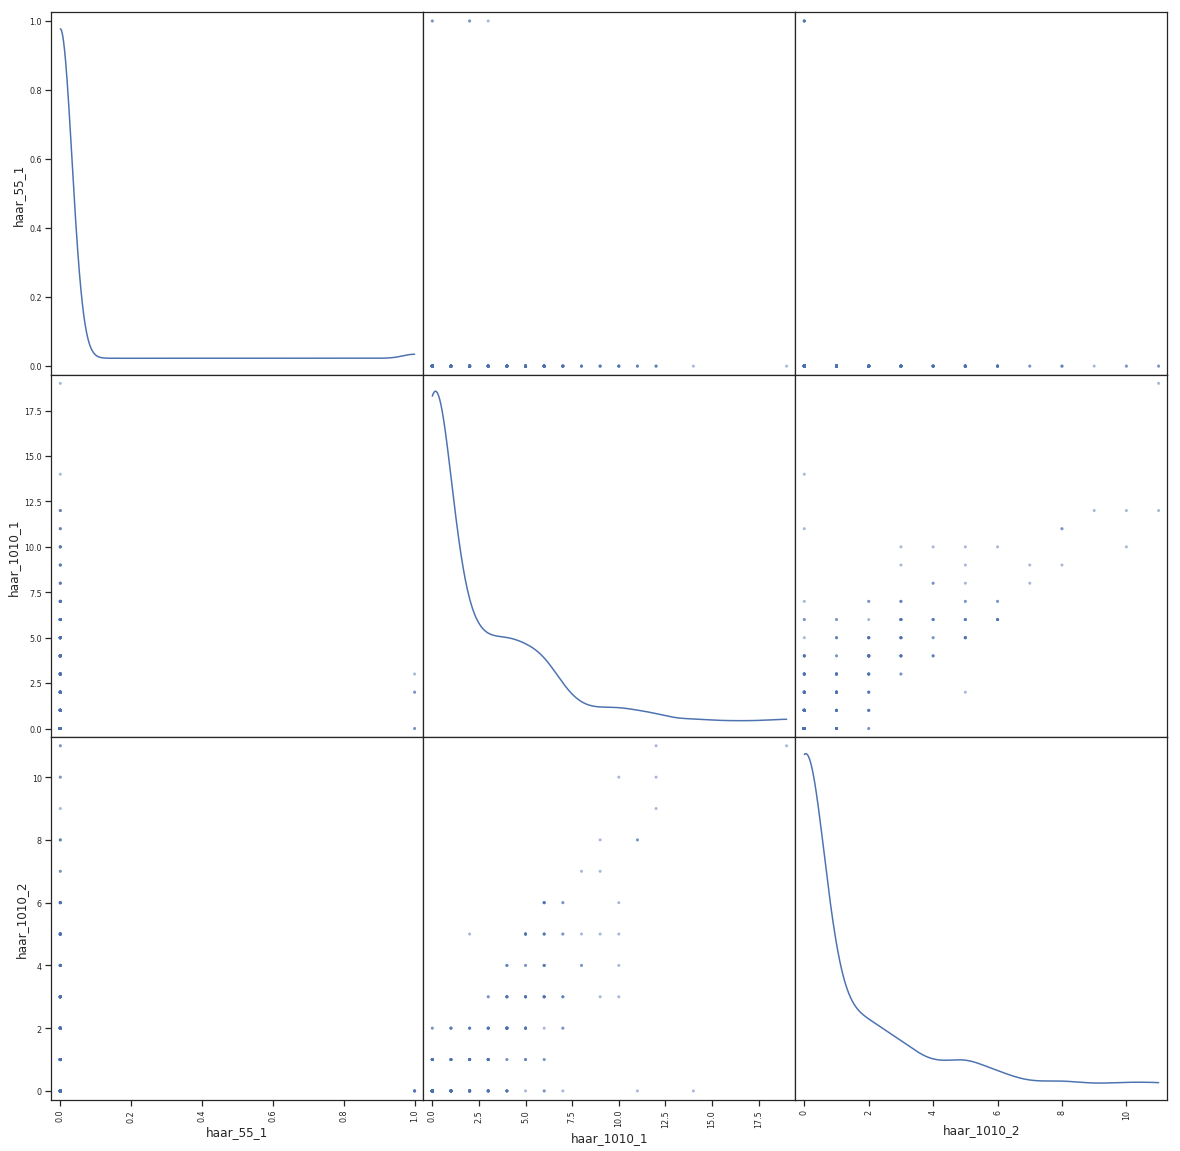

<Figure size 5400x3600 with 0 Axes>

In [87]:
pd.scatter_matrix(data[['haar_55_1', 'haar_1010_1', 'haar_1010_2']], figsize=(20, 20), diagonal='kde')
plt.figure(dpi=900)
plt.show()

**Сравним haar_2020_1, haar_2020_2, haar_2020_3**

/Users/romakindmitriy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


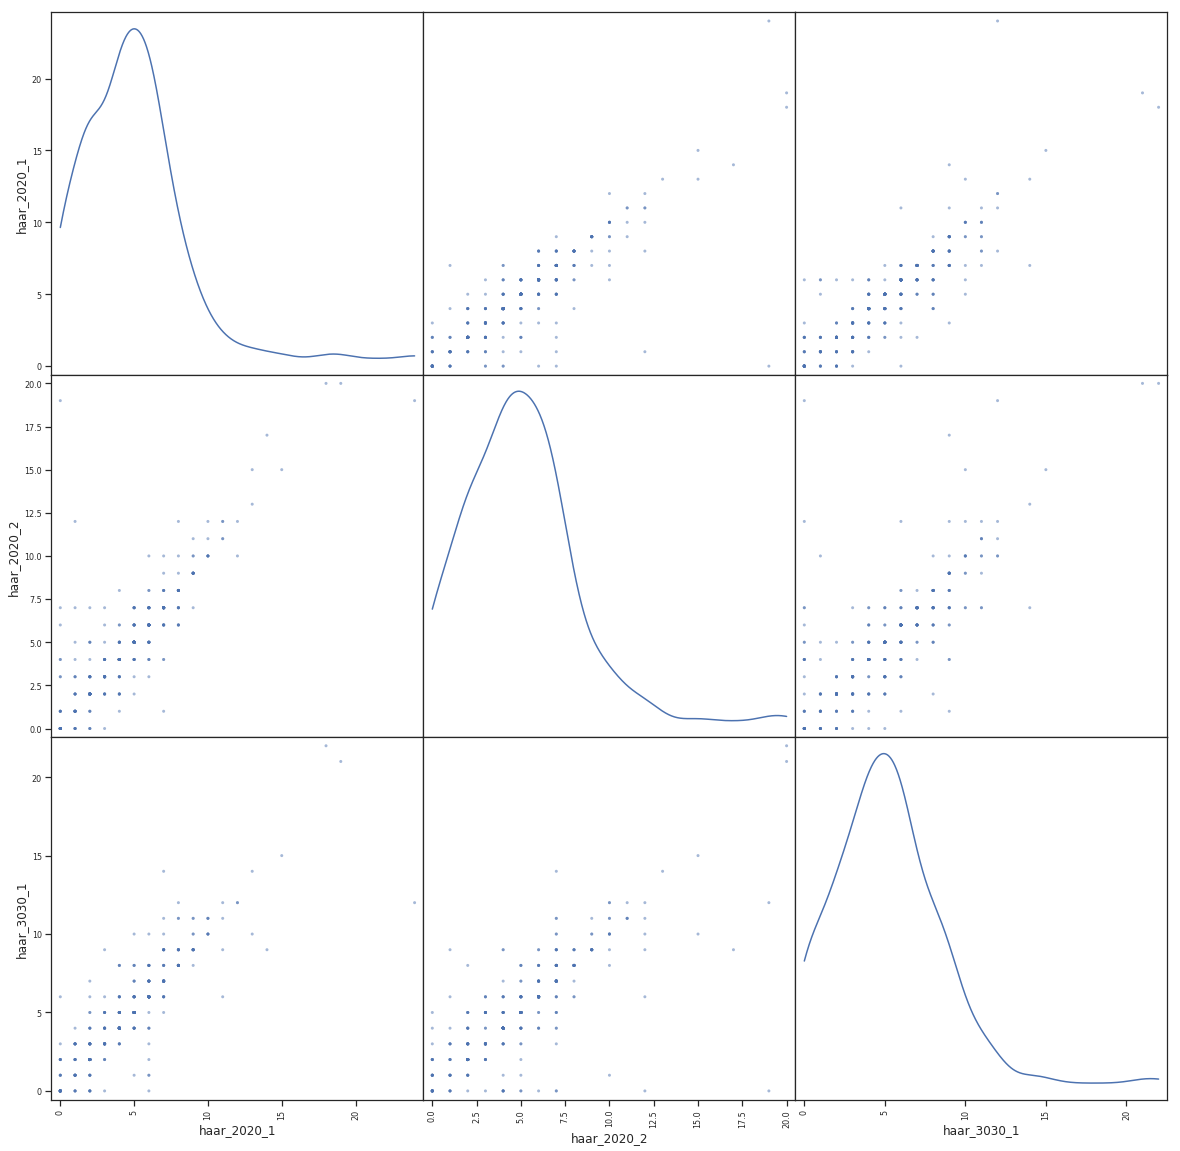

<Figure size 5400x3600 with 0 Axes>

In [88]:
pd.scatter_matrix(data[['haar_2020_1', 'haar_2020_2', 'haar_3030_1']], figsize=(20, 20), diagonal='kde')
plt.figure(dpi=900)
plt.show()

**Сравним haar_3030_1, haar_3030_2, haar_3030_3**

/Users/romakindmitriy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


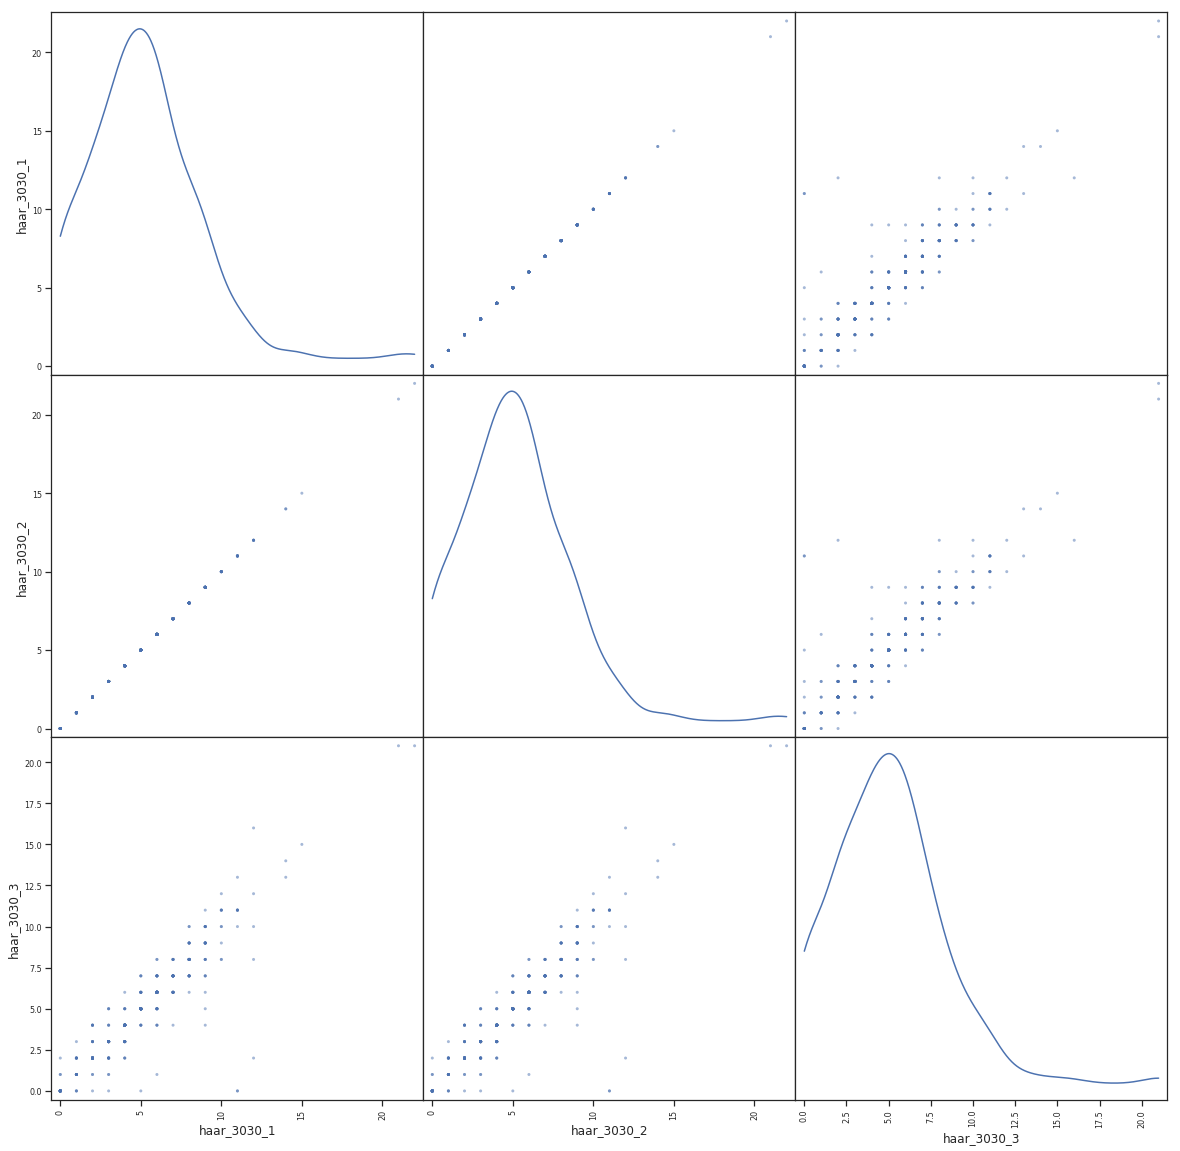

<Figure size 5400x3600 with 0 Axes>

In [89]:
pd.scatter_matrix(data[['haar_3030_1', 'haar_3030_2', 'haar_3030_3']], figsize=(20, 20), diagonal='kde')
plt.figure(dpi=900)
plt.show()

**Сравним haar_2020_3, haar_3030_3, haar_4040**

/Users/romakindmitriy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


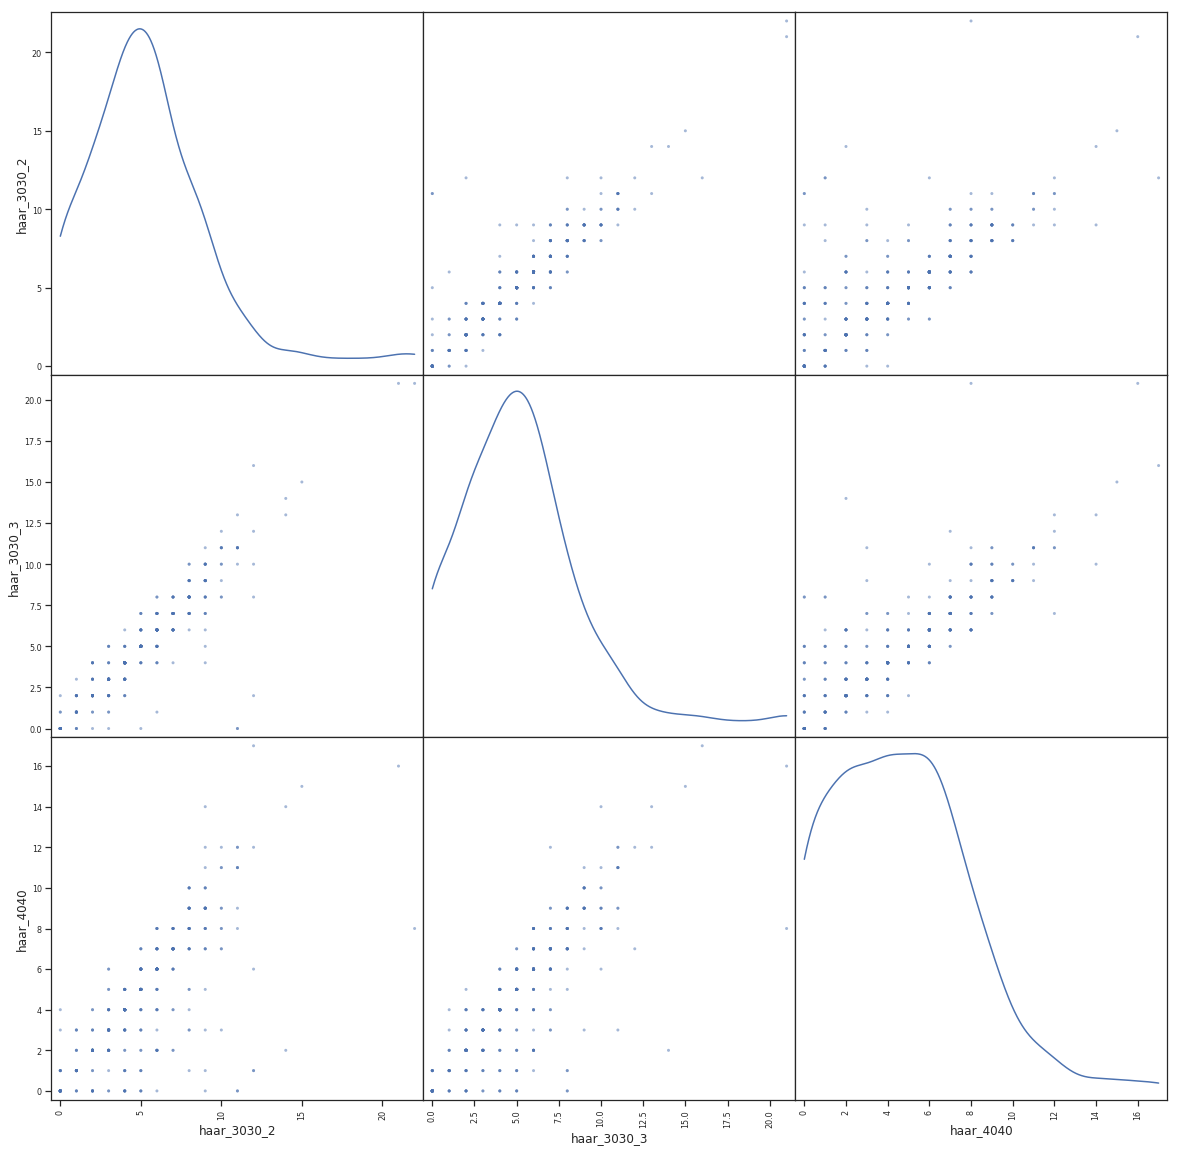

<Figure size 5400x3600 with 0 Axes>

In [90]:
pd.scatter_matrix(data[['haar_3030_2', 'haar_3030_3', 'haar_4040']], figsize=(20, 20), diagonal='kde')
plt.figure(dpi=900)
plt.show()

**Сравним haar_1010_1, haar_1010_2, haar_2020_1, haar_2020_2, haar_3030_1, haar_3030_2, haar_3030_3, haar_4040, haar_55_1**

<Figure size 5400x3600 with 0 Axes>

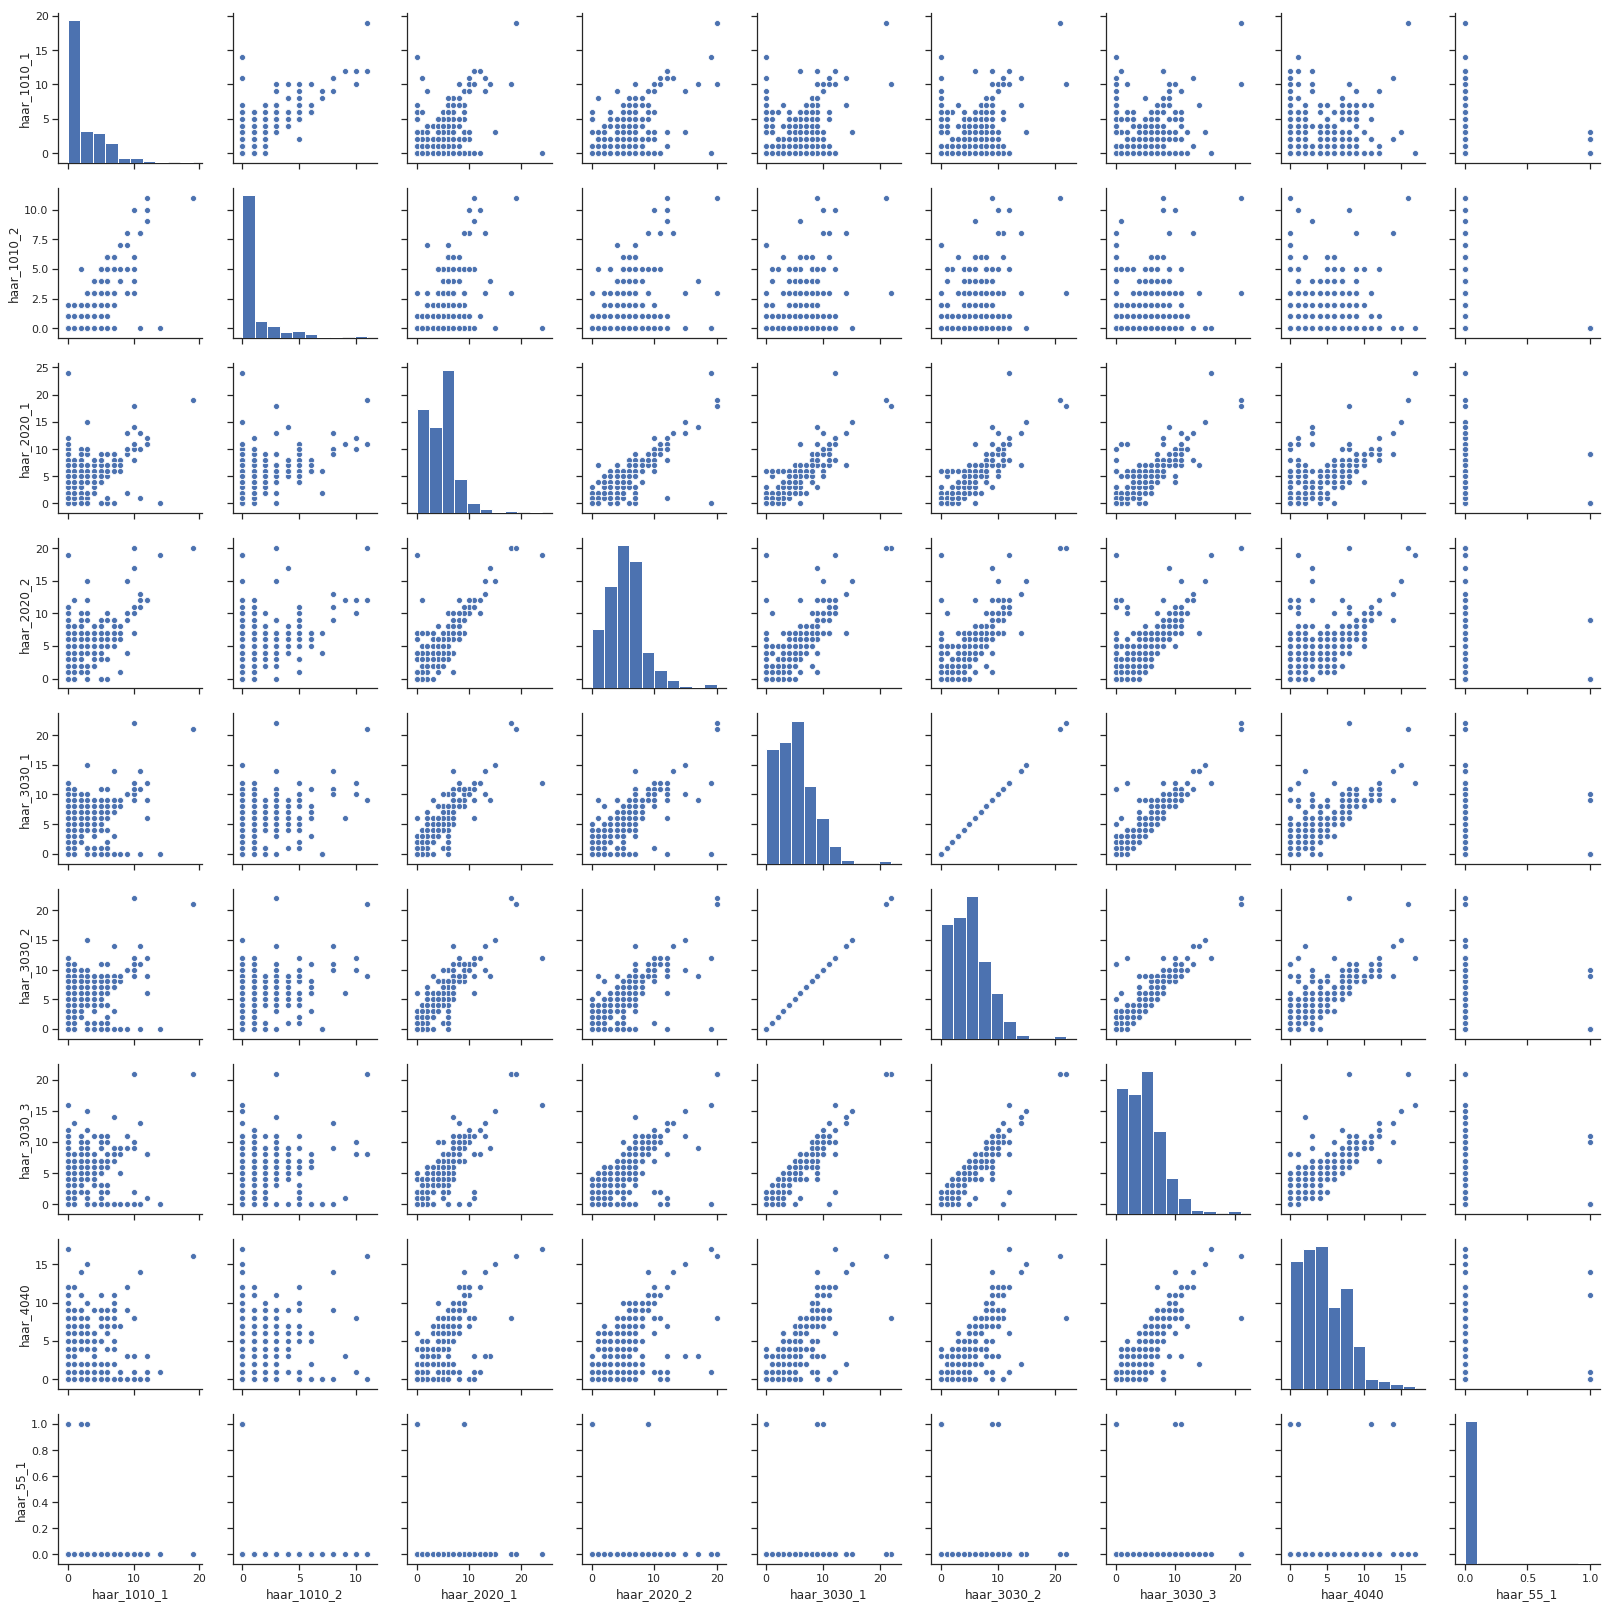

In [117]:
plt.figure(dpi=900)
sns.pairplot(data)
plt.savefig("./../pairplot(data).jpg")

**Проанализируем каждый стоолбец отдельно**

<Figure size 5400x3600 with 0 Axes>

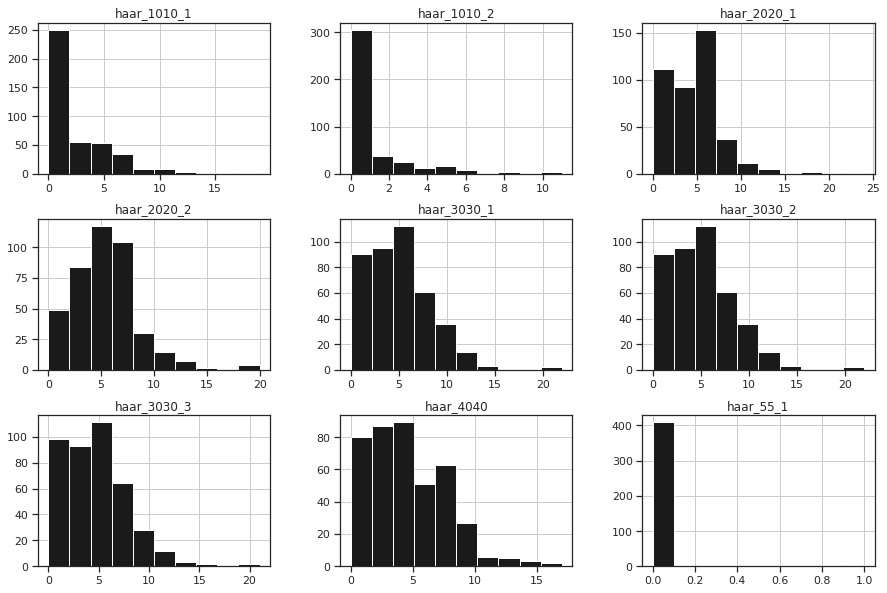

<Figure size 432x288 with 0 Axes>

In [96]:
dt = data
plt.figure(dpi=900)
dt.hist(color = 'k', figsize=(15,10))
plt.show()

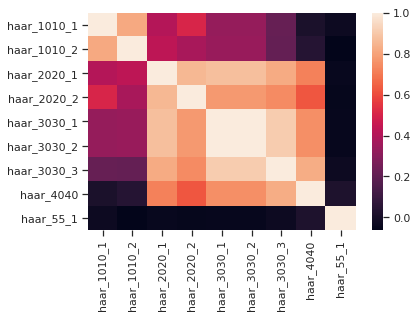

In [93]:
sns.heatmap(dt.corr());

# The best cascade Haar

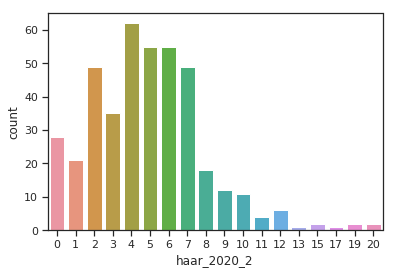

In [137]:
sns.countplot(data['haar_2020_2'])

In [115]:
head = ['haar_1010_1', 'haar_1010_2', 'haar_2020_1', 'haar_2020_2', 'haar_3030_1', 
        'haar_3030_2', 'haar_3030_3', 'haar_4040', 'haar_55_1']

zero = []

for j in range(0, len(head)):
    sumZero = 0
    for i in data[head[j]]:
        if i == 0:
            sumZero += 1
    
    zero.append(sumZero)

print(zero)

[199, 260, 31, 28, 31, 31, 36, 49, 408]
